In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [8]:
df = pd.read_csv(r"C:\Users\Joshva\OneDrive\Desktop\VS Code\datasets\IMDB Dataset.csv")  # Change filename if needed
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [9]:
print(df.head())  # Display first 5 rows
print()
print("Available columns:", df.columns)  # List all column names


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Available columns: Index(['review', 'sentiment'], dtype='object')


In [10]:
print("Unique Sentiment Values:", df['sentiment'].unique())


Unique Sentiment Values: ['positive' 'negative']


C:\Users\Joshva\AppData\Local\Temp\ipykernel_14516\2783121197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df,palette='viridis')


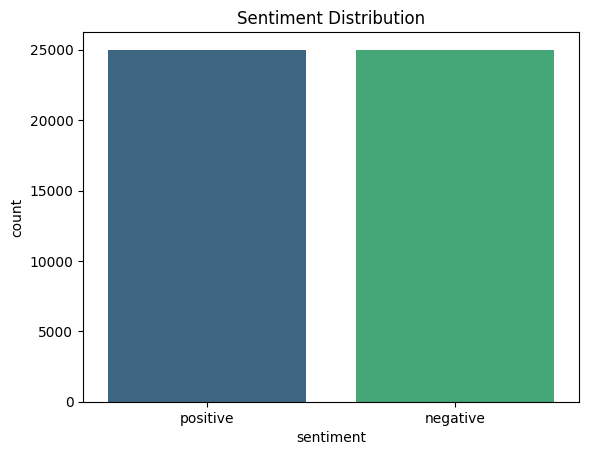

In [11]:
sns.countplot(x='sentiment', data=df,palette='viridis')
plt.title("Sentiment Distribution")
plt.show()


In [12]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

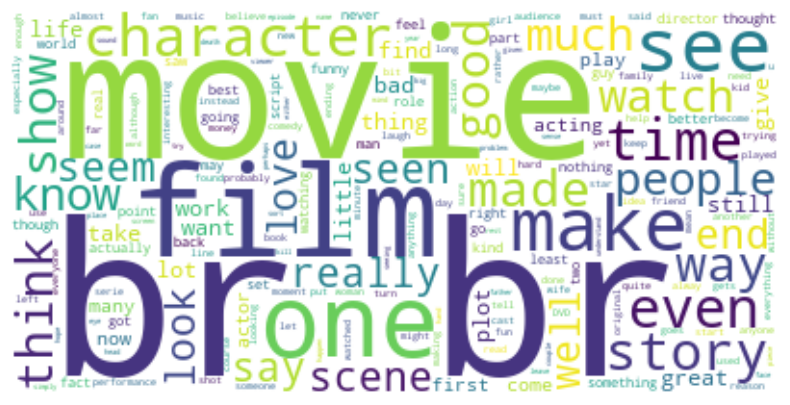

In [13]:
wc = WordCloud(background_color="white", max_words=200).generate(" ".join(df['review']))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer



stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text.lower())  # Convert to lowercase & tokenize
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove stopwords
    return " ".join(words)

df['cleaned_text'] = df['review'].apply(preprocess_text)

# Convert text to numerical format
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])


In [15]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
df.dropna(inplace=True)  # Remove missing values
df.reset_index(drop=True, inplace=True)  # Reset index after dropping rows




In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8874


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['cleaned_text'])
X_seq = tokenizer.texts_to_sequences(df['cleaned_text'])
X_padded = pad_sequences(X_seq, maxlen=100)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_padded, df['sentiment'], test_size=0.2, random_state=42)

# Define LSTM Model
model = Sequential([
    Embedding(5000, 128, input_length=100),
    LSTM(128, return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=256, validation_data=(X_test, y_test))

# Evaluate Model
loss, acc = model.evaluate(X_test, y_test)
print("LSTM Model Accuracy:", acc)


c:\Users\Joshva\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 471ms/step - accuracy: 0.7375 - loss: 0.4992 - val_accuracy: 0.8664 - val_loss: 0.3230
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 62s 397ms/step - accuracy: 0.8944 - loss: 0.2625 - val_accuracy: 0.8805 - val_loss: 0.2828
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 603ms/step - accuracy: 0.9099 - loss: 0.2292 - val_accuracy: 0.8740 - val_loss: 0.2951
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8727 - loss: 0.2998
LSTM Model Accuracy: 0.8740000128746033


In [18]:
model.save("lstm_sentiment_model.keras")



In [19]:
new_review = '''I caught this film on AZN on cable. It sounded like it would be a good film, a Japanese "Green Card".
 I can't say I've ever disliked an Asian film, quite the contrary. Some of the most incredible horror films of all time are Japanese and Korean,
   and I am a HUGE fan of John Woo's Hong Kong films. I an not adverse to a light hearted films, like Tampopo or Chung King Express (two of my favourites), 
   so I thought I would like this. Well, I would rather slit my wrists and drink my own blood than watch this laborious, badly acted film ever again.
   <br /><br />I think the director Steven Okazaki must have spiked the water with Quaalude, because no one in this film had a personality.
     And when any of the characters DID try to act, as opposed to mumbling a line or two, their performance came across as forced and incredibly fake. 
     I honestly did not think that anyone had ever acted before...the ONLY person who sounded genuine was Brenda Aoki.. 
     I find it amazing that this is promoted as a comedy, because I didn't laugh once. 
     Even MORE surprising is that CBS morning news called this "a refreshing breath of comedy". 
     It was neither refreshing, nor a breath of comedy. And the ending was very predictable,
       the previous reviewer must be an idiot to think such things.
       <br /><br />AVOID this film unless you want to see a boring predictable plot line and wooden acting. 
       I actually think that "Spike of Bensonhurst" is a better acted film than this...and I walked out half way through that film!'''

In [20]:

# Preprocess the new review
new_review_cleaned = preprocess_text(new_review)  # Use the function you defined earlier

# Convert to TF-IDF format
new_review_tfidf = vectorizer.transform([new_review_cleaned])

# Predict sentiment
lr_prediction = model1.predict(new_review_tfidf)[0]
print("Logistic Regression Prediction:", "Positive" if lr_prediction ==1 else "Negative")


Logistic Regression Prediction: Negative


In [21]:
# Tokenize and pad the new review
new_review_seq = tokenizer.texts_to_sequences([new_review_cleaned])
new_review_padded = pad_sequences(new_review_seq, maxlen=100)

# Predict sentiment
lstm_prediction = model.predict(new_review_padded)[0][0]
print("LSTM Prediction:", "Positive" if lstm_prediction >= 0.8 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
LSTM Prediction: Negative
